<a href="https://colab.research.google.com/github/jaekyoungkim/tensor2ml_NLP/blob/main/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%99%80_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%9C%BC%EB%A1%9C_%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94_%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC(ch5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# quora questions pairs 문제
# 서비스에 올라온 질문들 중에서 어떤 질문들 서로 유사한지 파악 (영어 데이터만 다룸)
# 쿼라 사용자 월 1억명정도 수많은 질문들이 올라옴
#kaggle연결

# 1. 먼저 본인의 캐글 계정에서 API Token 을 다운받습니다.
# 2. Colab 으로 가서 밑의 코드를 실행시킵니다
#!pip install kaggle
#from google.colab import files
#files.upload()
# https://medium.com/hyunjulie/%EC%BA%90%EA%B8%80%EA%B3%BC-%EA%B5%AC%EA%B8%80-colab-%EC%97%B0%EA%B2%B0%ED%95%B4%EC%A3%BC%EA%B8%B0-6a274f6de81d 참고하기

In [2]:
# 데이터 불러오기
!pip install kaggle

In [3]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 3.1 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=09645e8676bcd6c493afd34ecf3bd30ca6fbf8bbad0a9e8d5188e4a237f5d9b9
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kimjaekyoung","key":"3e838f9806be93b88eadf3a7744d40ff"}'}

In [5]:
ls -1ha kaggle.json

kaggle.json


In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list



ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         78           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        116           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        863           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        174           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1891           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      13737           False  
house-pr

In [7]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle competitions download -c quora-question-pairs

 94% 291M/309M [00:02<00:00, 129MB/s]
100% 309M/309M [00:02<00:00, 148MB/s]


In [9]:
!ls

quora-question-pairs.zip  sample_data


In [10]:
!unzip quora-question-pairs.zip

Archive:  quora-question-pairs.zip
  inflating: sample_submission.csv.zip  
  inflating: test.csv                
  inflating: test.csv.zip            
  inflating: train.csv.zip           


In [11]:
!unzip train.csv.zip
!upzip test.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               
/bin/bash: upzip: command not found


In [12]:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
%matplotlib inline


In [13]:
DATA_IN_PATH = '/content/'

train_data = pd.read_csv(DATA_IN_PATH + 'train.csv')
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [14]:
print("파일크기")
for file in os.listdir(DATA_IN_PATH):
  if 'csv' in file and 'zip' not in file:
    print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일크기
test.csv                      314.02MB
train.csv                     63.4MB


In [15]:
print("전체 학습 데이터의 개수 : {}".format(len(train_data)))


전체 학습 데이터의 개수 : 404290


In [16]:
train_set = pd.Series(train_data['question1'].tolist()+ train_data['question2'].tolist()).astype(str)

In [17]:
train_set.head()  # q1과 q2 를 연결함 # 각각 40만개 씩이었으니 총 80만개의 질문이 잇엇던 셈

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
dtype: object

In [18]:
train_set.value_counts()

What are the best ways to lose weight?                                             161
How can you look at someone's private Instagram account without following them?    120
How can I lose weight quickly?                                                     111
What's the easiest way to make money online?                                        88
Can you see who views your Instagram?                                               79
                                                                                  ... 
Why are forged metals more ductile?                                                  1
How can I study law after B.Com?                                                     1
How can I find out my favorite color?                                                1
What does the phrase "quantity over quality" mean?                                   1
What are the best resorts for parties in Madikeri (Coorg)?                           1
Length: 537361, dtype: int64

In [19]:
print('교육데이터의 총 질문수: {}'.format(len(np.unique(train_set)))) # 53만개가 유니크 데이터이므로 80-53 = 27만개가 중복된것을 알 수 있음
print('반복해서 나타나는 질문수 : {}'.format(np.sum(train_set.value_counts()>1))) # 27만개 데이터는 11만개의 고유한 질문으로 이루어짐

교육데이터의 총 질문수: 537361
반복해서 나타나는 질문수 : 111873


Text(0.5, 0, 'number of occurrences of questions')

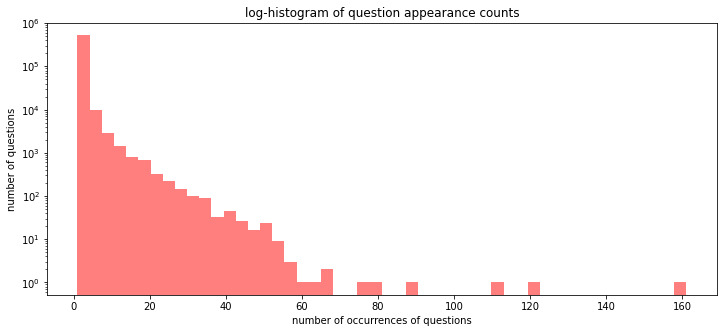

In [20]:
plt.figure(figsize=(12,5))
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color='r', label = 'word')
plt.yscale('log', nonposy='clip')
plt.title('log-histogram of question appearance counts')
plt.ylabel('number of questions')
plt.xlabel('number of occurrences of questions')

In [21]:
print("중복 최대 개수: {}".format(np.max(train_set.value_counts())))
print("중복 최소 개수: {}".format(np.min(train_set.value_counts())))
print("중복 평균 개수: {}".format(np.mean(train_set.value_counts())))
print("중복 중간 개수: {}".format(np.median(train_set.value_counts())))


중복 최대 개수: 161
중복 최소 개수: 1
중복 평균 개수: 1.50472401234924
중복 중간 개수: 1.0


{'boxes': [<matplotlib.lines.Line2D at 0x7fa76b1c1c10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa76b1c5cd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa76b1ce290>],
 'means': [<matplotlib.lines.Line2D at 0x7fa76b1c9d10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa76b1c97d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa76b1c5250>,
  <matplotlib.lines.Line2D at 0x7fa76b1c5790>]}

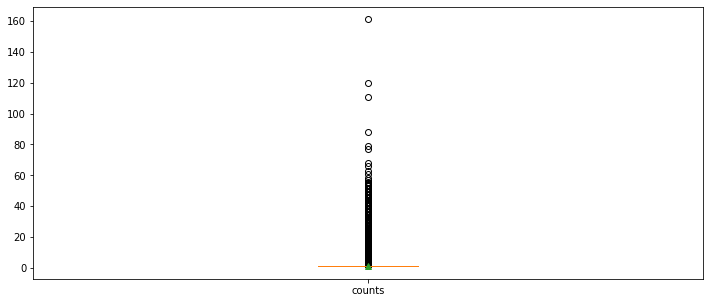

In [22]:
plt.figure(figsize=(12,5))
plt.boxplot([train_set.value_counts()], labels=['counts'], showmeans =True)

(-0.5, 799.5, 599.5, -0.5)

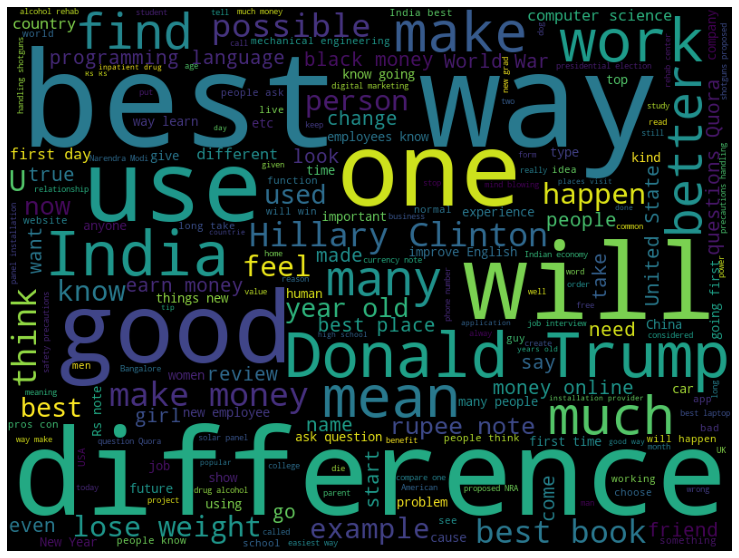

In [23]:
from wordcloud import WordCloud 
cloud = WordCloud(width = 800, height=600).generate(" ".join(train_set.astype(str)))
plt.figure(figsize = (15,10))
plt.imshow(cloud)
plt.axis('off')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


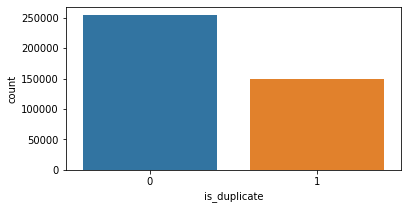

In [24]:
fig , axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_data['is_duplicate'])


In [25]:
train_length = train_set.apply(len);train_length # 각각의 문장길이를 나타냄

0          66
1          51
2          73
3          50
4          76
         ... 
808575     79
808576     42
808577     17
808578    127
808579     45
Length: 808580, dtype: int64

Text(0, 0.5, 'probability')

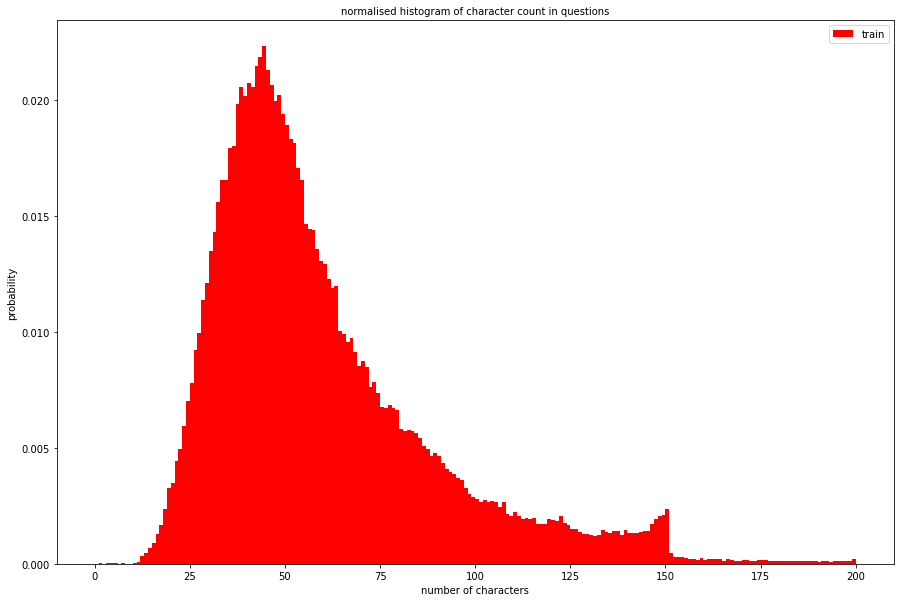

In [26]:
plt.figure(figsize=(15,10))
plt.hist(train_length, bins =200, range = [0,200], facecolor='r',density=True, label='train') # normed 대신 density사용
plt.title('normalised histogram of character count in questions', fontsize= 10)
plt.legend()
plt.xlabel('number of characters')
plt.ylabel('probability')

In [27]:
print('질문 최대길이 :{}'.format(np.max(train_length)))
print('질문 최소길이 :{}'.format(np.min(train_length)))
print('질문 평균길이 :{}'.format(np.mean(train_length)))
print('질문 중간길이 :{}'.format(np.median(train_length)))

질문 최대길이 :1169
질문 최소길이 :1
질문 평균길이 :59.82254817086745
질문 중간길이 :51.0


{'boxes': [<matplotlib.lines.Line2D at 0x7fa7699efc50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa769986d50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa7699aef10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa7699ae3d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa7699efed0>,
  <matplotlib.lines.Line2D at 0x7fa769986290>]}

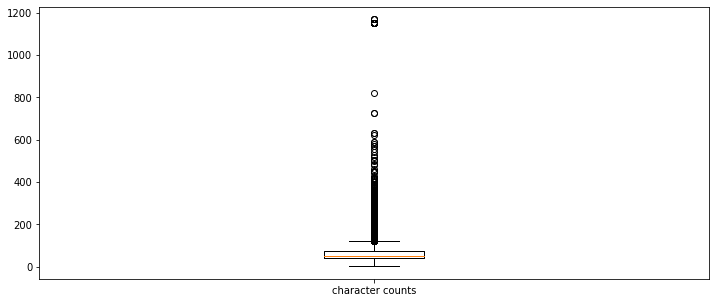

In [28]:
plt.figure(figsize= (12,5))
plt.boxplot(train_length, labels =['character counts'])

In [29]:
# 단어개수를 기준으로 개수 파악하기, 이전에는 문자한글자한글자를 단위로 판단함
train_word_counts= train_set.apply(lambda x :len(x.split(' ')))

In [30]:
train_word_counts

0         14
1          8
2         14
3         11
4         13
          ..
808575    13
808576     9
808577     3
808578    25
808579    10
Length: 808580, dtype: int64

Text(0, 0.5, 'prob')

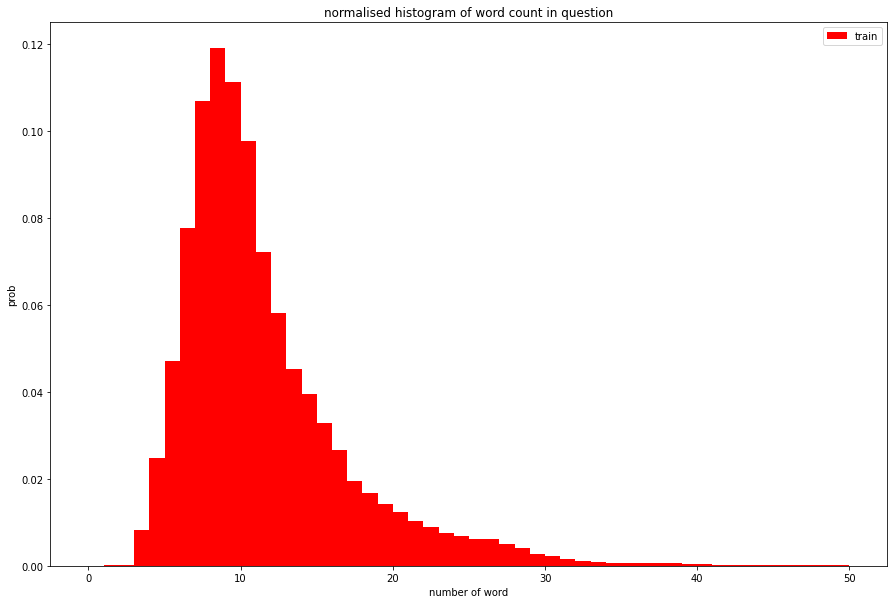

In [31]:
plt.figure(figsize = (15,10))
plt.hist(train_word_counts, bins =50, range =[0,50], facecolor='r', density= True, label = 'train')
plt.title('normalised histogram of word count in question')
plt.legend()
plt.xlabel('number of word')
plt.ylabel('prob')

In [32]:
qmarks = np.mean(train_set.apply(lambda x : "?" in x)) # 물음표가 구두점으로사용됨
math =np.mean(train_set.apply( lambda x : "[math]" in x ))
fullstop = np.mean(train_set.apply( lambda x  : '.' in x))
capital_first = np.mean(train_set.apply( lambda x : x[0].isupper()))
capitals = np.mean(train_set.apply(lambda x : max([y.isupper() for y in x])))
numbers = np.mean(train_set.apply(lambda x : max([y.isdigit() for y in x])))
print(qmarks) # 물음표가 있는 질문
print(math) # 수학 태그가 있는 질문
print(fullstop)  # 구두점. 
print(capital_first) # 첫번째 대문자
print(capitals)  # 대문자 포함
print(numbers) # 숫자가 있는 질문

0.9987385292735412
0.0011736624700091518
0.06308219347498083
0.9981325286304386
0.9995053055974672
0.11827153775755027


In [33]:
# 데이터 전처리
import pandas as pd
import numpy as np
import re
import json
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [34]:
DATA_IN_PATH = '/content/'
train_data = pd.read_csv(DATA_IN_PATH + 'train.csv', encoding= 'utf-8')
train_pos_data = train_data.loc[train_data['is_duplicate'] ==1]
train_neg_data = train_data.loc[train_data['is_duplicate'] ==0]

class_difference = len(train_neg_data) - len(train_pos_data);  class_difference

105764

In [35]:
sample_frac = 1- (class_difference) / len(train_neg_data)  ;sample_frac  # 58% 

0.5852831268846044

In [36]:
train_neg_data = train_neg_data.sample(frac =sample_frac) 

In [37]:
# neg와 pos의 비율을 얼추 맞춤
print("중복질문개수 :{}".format(len(train_pos_data)))
print("중복 아닌 질문개수 :{}".format(len(train_neg_data)))

중복질문개수 :149263
중복 아닌 질문개수 :149263


In [38]:
train_data = pd.concat([train_neg_data, train_pos_data]) ; len(train_data)

298526

In [39]:
# 이렇게 비율을 맞춘 데이터를 가지고 전처리 진행하기


questions1 = [str(s) for s  in train_data['question1']]
questions2 = [str(s) for s  in train_data['question2']]
print(questions1)
print(questions1[1])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [40]:
filtered_questions1 = list()
filtered_questions2 = list()
FILTERS = "([~.,!?\"':;)(])"
change_filter = re.compile(FILTERS) # 패턴 객체 생성. 정규식 표현으로 전처리 하기 위해 설정

for q in questions1:
  filtered_questions1.append(re.sub(change_filter, "",q).lower())

for q in questions2:
  filtered_questions2.append(re.sub(change_filter, "",q).lower())

In [41]:
filtered_questions1

['what are the best cities in the world to be single',
 'can christian ministries offshore work to churches in developing countries',
 'if i click on someones twitter account can they see that i viewed them',
 'in how many days i can increase height by hanging to a bar',
 'what are the major differences between transcription and translation in dna and rna',
 'if anyone says india has 8% gdp what does it exactly mean',
 'did iranians in the early ‘80s think turks were not as much as muslim as they were',
 'where is likely to centre given by cbse for improvement exams',
 'what is the best way to prepare for iitjee in three months of time',
 'how do i auto-verify that a phone number is valid/invalid',
 'what is the difference between t1 and t2 imaging in mri',
 'what does downvoting an answer do',
 'i did my be in ctm now working as secretary role now i understood i m good in managerial role now wanna do masters in project management in germany',
 'what are the strongest majors in terms o

In [42]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(filtered_questions1 + filtered_questions2)

In [43]:
questions1_sequence = tokenizer.texts_to_sequences(filtered_questions1)
questions2_sequence = tokenizer.texts_to_sequences(filtered_questions2)

In [44]:
MAX_SEQUENCE_LENGTH =31
q1_data =pad_sequences(questions1_sequence, maxlen = MAX_SEQUENCE_LENGTH, padding='post')
q2_data =pad_sequences(questions2_sequence, maxlen = MAX_SEQUENCE_LENGTH, padding='post')

In [45]:
q1_data

array([[    2,    11,     1, ...,     0,     0,     0],
       [   13,  1934, 25397, ...,     0,     0,     0],
       [   24,     5,  5083, ...,     0,     0,     0],
       ...,
       [    4,    21,     7, ...,     0,     0,     0],
       [    2,    21,  7818, ...,     0,     0,     0],
       [    9,    15,   301, ...,     0,     0,     0]], dtype=int32)

In [46]:
q1_data.shape

(298526, 31)

In [47]:
word_vocab={}
word_vocab = tokenizer.word_index
word_vocab["<PAD>"] = 0
word_vocab

{'the': 1,
 'what': 2,
 'is': 3,
 'how': 4,
 'i': 5,
 'to': 6,
 'a': 7,
 'in': 8,
 'do': 9,
 'of': 10,
 'are': 11,
 'and': 12,
 'can': 13,
 'for': 14,
 'you': 15,
 'why': 16,
 'best': 17,
 'my': 18,
 'it': 19,
 'on': 20,
 'does': 21,
 'which': 22,
 'be': 23,
 'if': 24,
 'or': 25,
 'some': 26,
 'get': 27,
 'that': 28,
 'have': 29,
 'should': 30,
 'with': 31,
 'your': 32,
 'an': 33,
 'from': 34,
 'india': 35,
 'will': 36,
 'people': 37,
 'who': 38,
 'when': 39,
 'like': 40,
 'good': 41,
 'would': 42,
 'at': 43,
 'there': 44,
 'as': 45,
 'quora': 46,
 'about': 47,
 'between': 48,
 'one': 49,
 'way': 50,
 'most': 51,
 'not': 52,
 'make': 53,
 'we': 54,
 'did': 55,
 'life': 56,
 'by': 57,
 'where': 58,
 'money': 59,
 'was': 60,
 'any': 61,
 'so': 62,
 'me': 63,
 'time': 64,
 'after': 65,
 'learn': 66,
 'they': 67,
 'know': 68,
 'this': 69,
 'whats': 70,
 'has': 71,
 'difference': 72,
 'new': 73,
 'think': 74,
 'trump': 75,
 'use': 76,
 'much': 77,
 'am': 78,
 'ever': 79,
 'indian': 80,
 'al

In [48]:
labels = np.array(train_data['is_duplicate'], dtype = int) ; labels.shape

(298526,)

In [49]:
data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) ; 
print(len(word_vocab))

76532


In [50]:
# 저장 옵션 설정하기
TRAIN_Q1_DATA = 'q1_train.npy'
TRAIN_Q2_DATA = 'q2_train.npy'
TRAIN_LABEL_DATA = 'label_train.npy'
DATA_CONFIGS = 'data_configs.json'

np.save(open(DATA_IN_PATH + TRAIN_Q1_DATA , 'wb'), q1_data)
np.save(open(DATA_IN_PATH + TRAIN_Q2_DATA , 'wb'), q2_data)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA , 'wb'), labels)

json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'))
# 질문과 라벨 데이터를 저장
# 딕셔너리 형태의 데이터 정보는 json파일로 저장함
# 전처리 완료!!

In [51]:
# 평가데이터에 대해서도 앞의 전처리 
test_data = pd.read_csv(DATA_IN_PATH + 'test.csv', encoding= 'utf-8')
print(test_data.head())
print(test_data.shape)

   test_id  ...                                          question2
0        0  ...  Why did Microsoft choose core m3 and not core ...
1        1  ...        How much cost does hair transplant require?
2        2  ...                      What you send money to China?
3        3  ...                                  What foods fibre?
4        4  ...                     How their can I start reading?

[5 rows x 3 columns]
(2345796, 3)


In [52]:
test_data.test_id

0                0
1                1
2                2
3                3
4                4
            ...   
2345791    2345791
2345792    2345792
2345793    2345793
2345794    2345794
2345795    2345795
Name: test_id, Length: 2345796, dtype: int64

In [53]:
valid_ids = [type(x) == int  for x in test_data.test_id] ; print(valid_ids)
test_data = test_data[valid_ids].drop_duplicates()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [54]:
test_data.shape

(2345796, 3)

In [55]:
test_questions1 = [str(s) for s in test_data['question1']]
test_questions2 = [str(s) for s in test_data['question2']]

filtered_test_questions1 = list()
filtered_test_questions2 = list()

for q in test_questions1 :
  filtered_test_questions1.append(re.sub(change_filter, "", q).lower())

for q in test_questions2 :
  filtered_test_questions2.append(re.sub(change_filter, "", q).lower())  

In [56]:
test_questions1_sequence = tokenizer.texts_to_sequences(filtered_test_questions1)
test_questions2_sequence = tokenizer.texts_to_sequences(filtered_test_questions2)

test_q1_data = pad_sequences(test_questions1_sequence, maxlen = MAX_SEQUENCE_LENGTH, padding='post')
test_q2_data = pad_sequences(test_questions2_sequence, maxlen = MAX_SEQUENCE_LENGTH, padding='post')

In [57]:
test_id = np.array(test_data['test_id']) ; test_id

array([      0,       1,       2, ..., 2345793, 2345794, 2345795])

In [58]:
print(test_q1_data.shape)
print(test_q2_data.shape)
print(test_id.shape)


(2345796, 31)
(2345796, 31)
(2345796,)


In [59]:
TEST_Q1_DATA = 'test_q1.npy'
TEST_Q2_DATA = 'test_q2.npy'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_IN_PATH + TEST_Q1_DATA, 'wb'), test_q1_data)
np.save(open(DATA_IN_PATH + TEST_Q2_DATA, 'wb'), test_q2_data)
np.save(open(DATA_IN_PATH + TEST_ID_DATA, 'wb'), test_id)


In [60]:
# 모델링 : 총 3개의 모델링 할예정 (xg boost, malstm, CNN)
# 1. XG 부스트 : 앙상블 모델 중 하나, 부스팅 기법을 사용하는 방법 , 트리 부스팅을 활용한 모델
#                 트리 부스팅 방식에 경사 하강법을 통해 최적화하는 방법, 연산량을 줄이기 위해 의사결정 트리를 구성할때 병렬처리를 사용해 빠른 시간에 학습이 가능
# 배깅 : 여러개의 학습 알고리즘, 모델을 통해 각각 결과를 예측하고 모든 결과를 동등하게 보고 취합해서 결과를 얻는 방싱, RF도 배깅의 한예임. PARALLEL
# 부스팅 : 각 결과를 순차적으로 취합하는데, 단순히 하나씩 취합하는 방법이 아니라 이전 알고리즘, 모델이 학습 후 잘못 예측한 부분에 가중치를 줘서 다시 모델로 가서 학습하는 방식 SEQUENTIAL
# 싱글 : CNN, RNN뜽




In [61]:
import numpy as np
DATA_IN_PATH = '/content/'
TRAIN_Q1_DATA = 'q1_train.npy'
TRAIN_Q2_DATA = 'q2_train.npy'
TRAIN_LABEL_DATA_FILE = 'label_train.npy'

train_q1_data = np.load(open(DATA_IN_PATH + TRAIN_Q1_DATA, 'rb'))
train_q2_data = np.load(open(DATA_IN_PATH + TRAIN_Q2_DATA, 'rb'))
train_labels = np.load(open(DATA_IN_PATH + TRAIN_LABEL_DATA_FILE, 'rb'))


In [62]:
train_input = np.stack((train_q1_data, train_q2_data), axis=1)
# stack 두질문을 하나의 쌍으로 만들기,
print(train_input.shape) # 29만개 데이터, 2개의 질문 각각 길이가 31
print(train_input)

(298526, 2, 31)
[[[    2    11     1 ...     0     0     0]
  [   22     3     1 ...     0     0     0]]

 [[   13  1934 25397 ...     0     0     0]
  [    4     9     5 ...     0     0     0]]

 [[   24     5  5083 ...     0     0     0]
  [   24   710   963 ...     0     0     0]]

 ...

 [[    4    21     7 ...     0     0     0]
  [    4    11   135 ...     0     0     0]]

 [[    2    21  7818 ...     0     0     0]
  [    2    21  7818 ...     0     0     0]]

 [[    9    15   301 ...     0     0     0]
  [    3    19   249 ...     0     0     0]]]


In [63]:
from sklearn.model_selection import train_test_split
train_input, eval_input, train_label, eval_label = train_test_split(train_input, train_labels, test_size= 0.2, random_state =4242)

In [64]:
import xgboost as xgb
train_data = xgb.DMatrix(train_input.sum(axis=1), label =train_label)
eval_data = xgb.DMatrix(eval_input.sum(axis=1), label= eval_label)
# xgb라이버리리의 데이터 형식이 dmatrix형태로 만들어야함
# 적용과정에서 sum함수를 사용
# 각데이터의 두 질문을 하나의 값으로 만들어 주기 위해서임
# 두개의 데이터를 묶어서
#하나의 리스트로 만든다
data_list = [(train_data , 'train'), (eval_data, 'valid')]


In [65]:
data_list

[(<xgboost.core.DMatrix at 0x7fa677b97250>, 'train'),
 (<xgboost.core.DMatrix at 0x7fa677322bd0>, 'valid')]

In [70]:
params={}
params['objective'] ='binary:logistic'  #목적함수
params['eval_metric'] = 'rmse' # 평가지표  root mean square error

In [71]:
bst = xgb.train(params, train_data, num_boost_round=1000, evals=data_list, early_stopping_rounds=10)  # epochs 1000, 조기멈춤 10

[0]	train-rmse:0.483741	valid-rmse:0.484148
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 10 rounds.
[1]	train-rmse:0.473706	valid-rmse:0.47436
[2]	train-rmse:0.466582	valid-rmse:0.467451
[3]	train-rmse:0.461979	valid-rmse:0.462881
[4]	train-rmse:0.458321	valid-rmse:0.459542
[5]	train-rmse:0.455522	valid-rmse:0.456988
[6]	train-rmse:0.453341	valid-rmse:0.454989
[7]	train-rmse:0.451804	valid-rmse:0.453742
[8]	train-rmse:0.449451	valid-rmse:0.451501
[9]	train-rmse:0.448192	valid-rmse:0.450454
[10]	train-rmse:0.446612	valid-rmse:0.449113
[11]	train-rmse:0.445403	valid-rmse:0.447994
[12]	train-rmse:0.444734	valid-rmse:0.447494
[13]	train-rmse:0.442785	valid-rmse:0.445705
[14]	train-rmse:0.441615	valid-rmse:0.444884
[15]	train-rmse:0.441075	valid-rmse:0.444461
[16]	train-rmse:0.440618	valid-rmse:0.444071
[17]	train-rmse:0.439883	valid-rmse:0.443426
[18]	train-rmse:0.439433	valid-rmse:0.443117
[19]	train-

In [66]:
DATA_IN_PATH = '/content/'
import numpy as np
TEST_Q1_DATA_FILE = 'test_q1.npy'
TEST_Q2_DATA_FILE = 'test_q2.npy'
TEST_ID_DATA_FILE = 'test_id.npy'

test_q1_data = np.load(open(DATA_IN_PATH + TEST_Q1_DATA_FILE, 'rb'))
test_q2_data = np.load(open(DATA_IN_PATH + TEST_Q2_DATA_FILE, 'rb'))
test_id_data = np.load(open(DATA_IN_PATH + TEST_ID_DATA_FILE, 'rb'))

In [72]:
test_input = np.stack((test_q1_data, test_q2_data), axis=1)
test_data =xgb.DMatrix(test_input.sum(axis=1))
test_predict = bst.predict(test_data)


In [73]:
DATA_OUT_PATH ='/content/OUT'
if not os.path.exists(DATA_OUT_PATH):
  os.makedirs(DATA_OUT_PATH)


In [74]:
output = pd.DataFrame({'test_id':test_id_data, 'is_duplicate':test_predict})
output.to_csv(DATA_OUT_PATH + 'simple_xgb.csv', index=False)

In [71]:
#import pandas as pd
#student_card = pd.DataFrame({'ID':[20190103, 20190222, 20190531],
#                             'name':['Kim', 'Lee', 'Jeong'],
#                             'class':['H', 'W', 'S']})

In [76]:
# 2.CNN텍스트 유사도 분석 모델
from tensorflow.keras import layers
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [77]:
DATA_IN_PATH = '/content/'
DATA_OUT_PATH = '/content/'
TRAIN_Q1_DATA_FILE = 'q1_train.npy'
TRAIN_Q2_DATA_FILE = 'q2_train.npy'
TRAIN_LABEL_DATA_FILE = 'label_train.npy'

DATA_CONFIGS = 'data_configs.json'

q1_data = np.load(open(DATA_IN_PATH + TRAIN_Q1_DATA_FILE, 'rb'))
q2_data = np.load(open(DATA_IN_PATH + TRAIN_Q2_DATA_FILE, 'rb'))
labels = np.load(open(DATA_IN_PATH + TRAIN_LABEL_DATA_FILE, 'rb'))
#prepro_configs = np.load(open(DATA_IN_PATH + DATA_CONFIGS, 'rb'))
prepro_configs = json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'))

SEED_NUM = 1234
tf.random.set_seed(SEED_NUM)


In [78]:

# 문장에 대한 입력값에서 특징을 뽑아 하나의 벡터를 추출하는 역할
# 합성곱 레이어와 맥스풀 레이어를 사용함
# 뽑은 특징값의 차원수를 조절하기 위한 dense 레이어를 활용

class SentenceEmbedding(layers.Layer):  # 모델이 아닌 모듈을 구현, tf.keras.Model상속이 아니라 laeyers를 상속
    def __init__(self, **kargs):
        super(SentenceEmbedding, self).__init__()

        self.conv = layers.Conv1D(kargs['conv_num_filters'], kargs['conv_window_size'], 
                                activation=tf.keras.activations.relu, 
                                padding='same')
        self.max_pool = layers.MaxPool1D(kargs['max_pool_seq_len'], 1)
        self.dense = layers.Dense(kargs['sent_embedding_dimension'], 
                              activation=tf.keras.activations.relu)

    def call(self, x):
        x = self.conv(x)
        x = self.max_pool(x)
        x = self.dense(x)
        
        return tf.squeeze(x, 1)

In [79]:


# 단어 임베딩 레이어 +  문장 임베딩 레이어 + 차원변환을 위한 dense 레이어로 구성
class SentenceSimilarityModel(tf.keras.Model):
    def __init__(self, **kargs):
        super(SentenceSimilarityModel, self).__init__(name=kargs['model_name'])
        
        self.word_embedding = layers.Embedding(kargs['vocab_size'], kargs['word_embedding_dimension'])
        self.base_encoder = SentenceEmbedding(**kargs)
        self.hypo_encoder = SentenceEmbedding(**kargs)
        self.dense = layers.Dense(kargs['hidden_dimension'], 
                                           activation=tf.keras.activations.relu)
        self.logit = layers.Dense(1, activation=tf.keras.activations.sigmoid)
        self.dropout = layers.Dropout(kargs['dropout_rate'])
        
    def call(self, x):
        x1, x2 = x
        b_x = self.word_embedding(x1)
        h_x = self.word_embedding(x2)
        b_x = self.dropout(b_x)
        h_x = self.dropout(h_x)
        
        b_x = self.base_encoder(b_x)
        h_x = self.hypo_encoder(h_x)
        
        e_x = tf.concat([b_x, h_x], -1)
        e_x = self.dense(e_x)
        e_x = self.dropout(e_x)
        
        return self.logit(e_x)

In [80]:
# 모델 하이퍼 파라미터 정의
model_name = 'cnn_similarity'
BATCH_SIZE = 1024
NUM_EPOCHS=100
VALID_SPLIT = 0.1
MAX_LEN =31


BATCH_SIZE = 1024
NUM_EPOCHS = 100
VALID_SPLIT = 0.1
MAX_LEN = 31


kargs = {'model_name': model_name,
         'vocab_size': data_configs['vocab_size'],
         'word_embedding_dimension': 100,
         'conv_num_filters': 300,
         'conv_window_size': 3,
         'max_pool_seq_len': MAX_LEN,
         'sent_embedding_dimension': 128,
         'dropout_rate': 0.2,
         'hidden_dimension': 200,
         'output_dimension':1}

In [81]:
# 모델 생성 : 
Model = SentenceSimilarityModel(**kargs)

Model.compile(optimizer = tf.keras.optimizers.Adam(1e-3),
              loss = tf.losses.BinaryCrossentropy(),
              metrics = [tf.keras.metrics.BinaryAccuracy(name='accuracy')])

In [82]:
# 모델학습 

# Earlystop
ealrystop_callback = EarlyStopping(monitor ='val_accuracy', min_delta=0.0001, patience =1)
# min_delta : the threshold that triggers the termination
# patience : no improvement epochs
checkpoint_path = DATA_OUT_PATH + model_name + '/weight.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

if os.path.exists(checkpoint_dir):
  print("{} --Folder already exists \n".format(checkpoint_dir))
else:
  os.makedirs(checkpoint_dir, exist_ok = True)
  print("{}-- folder create complete \n".format(checkpoint_dir))

cp_callback = ModelCheckpoint(checkpoint_path, monitor ='val_accuracy', verbose=1, save_best_only=True, save_weights_only = True)


/content/cnn_similarity-- folder create complete 



In [83]:
history = Model.fit((q1_data,q2_data), labels, batch_size=BATCH_SIZE, epochs= NUM_EPOCHS, validation_split = VALID_SPLIT, 
                    callbacks = [ealrystop_callback, cp_callback])

Epoch 1/100
263/263 [==============================] - ETA: 0s - loss: 0.5509 - accuracy: 0.7168
Epoch 00001: val_accuracy improved from -inf to 0.72901, saving model to /content/cnn_similarity/weight.h5
263/263 [==============================] - 19s 37ms/step - loss: 0.5509 - accuracy: 0.7168 - val_loss: 0.5121 - val_accuracy: 0.7290
Epoch 2/100
263/263 [==============================] - ETA: 0s - loss: 0.4460 - accuracy: 0.7907
Epoch 00002: val_accuracy improved from 0.72901 to 0.77319, saving model to /content/cnn_similarity/weight.h5
263/263 [==============================] - 9s 35ms/step - loss: 0.4460 - accuracy: 0.7907 - val_loss: 0.4500 - val_accuracy: 0.7732
Epoch 3/100
263/263 [==============================] - ETA: 0s - loss: 0.3561 - accuracy: 0.8393
Epoch 00003: val_accuracy improved from 0.77319 to 0.81396, saving model to /content/cnn_similarity/weight.h5
263/263 [==============================] - 9s 35ms/step - loss: 0.3561 - accuracy: 0.8393 - val_loss: 0.4226 - val_ac

In [87]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

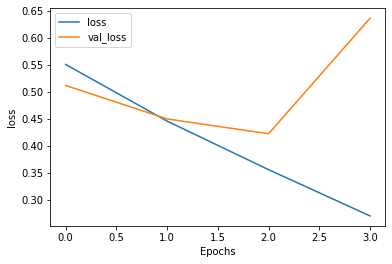

In [88]:
import matplotlib.pyplot as plt
plot_graphs(history, 'loss')


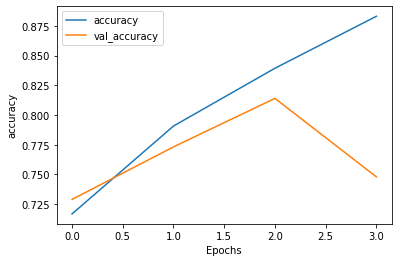

In [89]:
plot_graphs(history, 'accuracy')

In [94]:
# 데이터 제출하기
TEST_Q1_DATA_FILE = 'test_q1.npy'
TEST_Q2_DATA_FILE = 'test_q2.npy'
TEST_ID_LABEL_FILE = 'test_id.npy'

test_q1_data = np.load(open(DATA_IN_PATH + TEST_Q1_DATA_FILE, 'rb'))
test_q2_data = np.load(open(DATA_IN_PATH + TEST_Q2_DATA_FILE, 'rb'))
test_id_data = np.load(open(DATA_IN_PATH + TEST_ID_LABEL_FILE, 'rb'),allow_pickle =True)
print(test_q1_data)
print(test_q2_data)
print(test_id_data)

[[  4  21   1 ...   0   0   0]
 [ 30   5  29 ...   0   0   0]
 [  2 103   3 ...   0   0   0]
 ...
 [  2  11  26 ...   0   0   0]
 [  2 125   1 ...   0   0   0]
 [  2   3   1 ...   0   0   0]]
[[  16   55 1005 ...    0    0    0]
 [   4   77  325 ...    0    0    0]
 [   2   15  637 ...    0    0    0]
 ...
 [  13    7  314 ...    0    0    0]
 [   2   11    1 ...    0    0    0]
 [   4    9    5 ...    0    0    0]]
[      0       1       2 ... 2345793 2345794 2345795]


In [96]:
SAVE_FILE_NM = 'weight.h5'
Model.load_weights(os.path.join(DATA_OUT_PATH, model_name, SAVE_FILE_NM))

predictions = Model.predict((test_q1_data, test_q2_data), batch_size= BATCH_SIZE)
predictions = predictions.squeeze(-1)


In [100]:
predictions

array([0.00097708, 0.205216  , 0.35054418, ..., 0.04559937, 0.00277918,
       0.19234014], dtype=float32)

In [102]:
print(test_q1_data.shape)
print(test_q2_data.shape)

(2345796, 31)
(2345796, 31)


In [99]:
predictions.shape

(2345796,)

In [111]:
# MaLSTM : 순서가 있는 입력 데이터에 적합하다는 평을 받는 순환신경망 기반의 모델
# 2016년 MIT 조나스 밀러가 쓴 siamese recurrent architectures for learning sentence similarity 논문에서 소개됨
# MaLSTM이란 맨허튼 거리 + LSTM의 줄임말
# 일반적인 문장의 유사도를 계산할때 코사인 유사도를 사용하는 대신 맨허튼 거리를 사용하는 모델
class MaLSTM(tf.keras.Model):
    
    def __init__(self, **kargs):
        super(MaLSTM, self).__init__(name=model_name)
        self.embedding = layers.Embedding(input_dim=kargs['vocab_size'],
                                     output_dim=kargs['embedding_dimension'])
        self.lstm = layers.LSTM(units=kargs['lstm_dimension'])
        
    def call(self, x):
        x1, x2 = x
        x1 = self.embedding(x1)
        x2 = self.embedding(x2)
        x1 = self.lstm(x1)
        x2 = self.lstm(x2)
        x = tf.exp(-tf.reduce_sum(tf.abs(x1 - x2), axis=1))
        
        return x

In [112]:
model_name = 'malstm_similarity'
BATCH_SIZE= 128
NUM_EPOCHS = 5
VALID_SPLIT = 0.1
kargs ={'vocab_size' : data_configs['vocab_size'],
        'embedding_dimension': 100,
        'lstm_dimension': 150 }



In [115]:
model = Model(**kargs)

model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])


In [116]:
# 모델학습 

# Earlystop
ealrystop_callback = EarlyStopping(monitor ='val_accuracy', min_delta=0.0001, patience =1)
# min_delta : the threshold that triggers the termination
# patience : no improvement epochs
checkpoint_path = DATA_OUT_PATH + model_name + '/weight.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

if os.path.exists(checkpoint_dir):
  print("{} --Folder already exists \n".format(checkpoint_dir))
else:
  os.makedirs(checkpoint_dir, exist_ok = True)
  print("{}-- folder create complete \n".format(checkpoint_dir))

cp_callback = ModelCheckpoint(checkpoint_path, monitor ='val_accuracy', verbose=1, save_best_only=True, save_weights_only = True)

/content/malstm_similarity-- folder create complete 



In [118]:
history = model.fit((q1_data, q2_data), labels, batch_size =BATCH_SIZE, epochs= NUM_EPOCHS, 
                    validation_split= VALID_SPLIT, callbacks=[ealrystop_callback, cp_callback])
# 4epoch 에서 가장 좋은 성능을 보이는것을 알 수 있다. 

Epoch 1/5
2100/2100 [==============================] - ETA: 0s - loss: 0.5342 - accuracy: 0.7333
Epoch 00001: val_accuracy improved from -inf to 0.65781, saving model to /content/malstm_similarity/weight.h5
2100/2100 [==============================] - 29s 12ms/step - loss: 0.5342 - accuracy: 0.7333 - val_loss: 0.6687 - val_accuracy: 0.6578
Epoch 2/5
2099/2100 [============================>.] - ETA: 0s - loss: 0.4060 - accuracy: 0.8190
Epoch 00002: val_accuracy improved from 0.65781 to 0.78050, saving model to /content/malstm_similarity/weight.h5
2100/2100 [==============================] - 25s 12ms/step - loss: 0.4060 - accuracy: 0.8191 - val_loss: 0.5016 - val_accuracy: 0.7805
Epoch 3/5
2099/2100 [============================>.] - ETA: 0s - loss: 0.3561 - accuracy: 0.8470
Epoch 00003: val_accuracy did not improve from 0.78050
2100/2100 [==============================] - 24s 12ms/step - loss: 0.3561 - accuracy: 0.8470 - val_loss: 0.5243 - val_accuracy: 0.7728


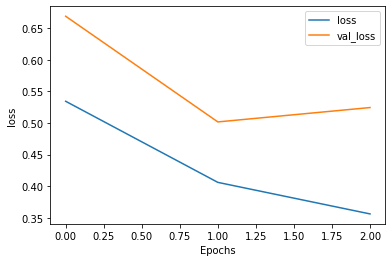

In [119]:
plot_graphs(history, 'loss')

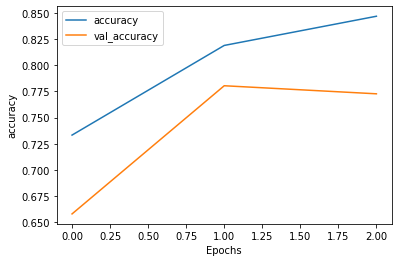

In [120]:
plot_graphs(history, 'accuracy')